<a href="https://colab.research.google.com/github/Surajkr1166/Infosys-SpringBoard-Internship/blob/Task-1/creditUnderwritingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#upload the dataset local device
from google.colab import files
uploaded = files.upload()

Saving credit_underwriting_data.csv to credit_underwriting_data.csv


In [ ]:
#load the dataset
data = pd.read_csv('credit_underwriting_data.csv')

In [ ]:
# Step 1: Data Preprocessing
# Handle missing values (fill numeric with median and categorical with mode)
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


<ipython-input-4-30c687e99dab>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-4-30c687e99dab>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Gender', 'Marital_Status', 'Loan_Purpose', 'Residence_State', 'Employment_status'], drop_first=True)


In [ ]:
# Define features and target
X = data.drop(columns=['Applicant_ID', 'Loan_Status(Target)'])
y = data['Loan_Status(Target)'].apply(lambda x: 1 if x == 'Approved' else 0)


In [ ]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Model Development
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 4: Model Evaluation
# Predictions and probabilities
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]


In [ ]:
# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", roc_auc)


AUC-ROC Score: 0.9996237662310363


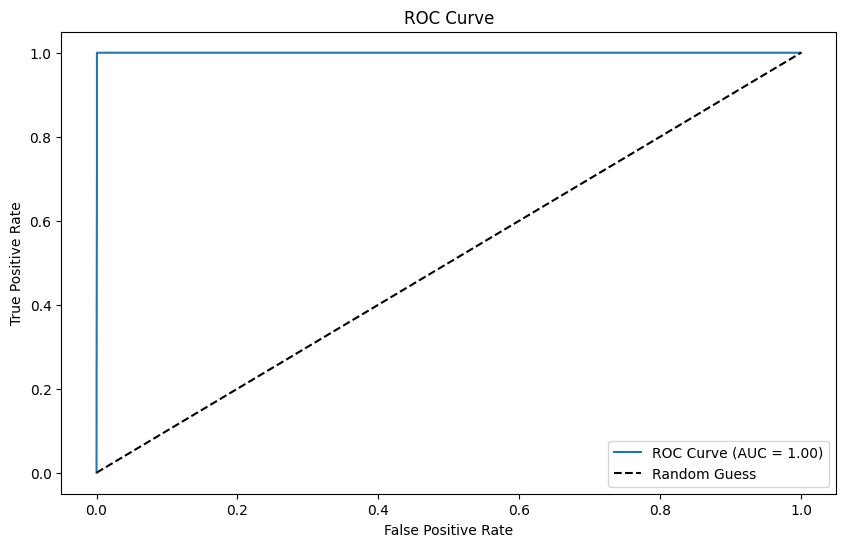

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

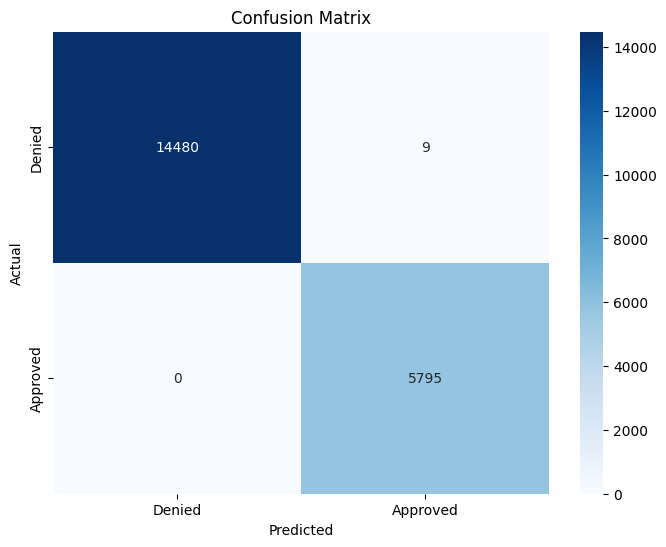

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

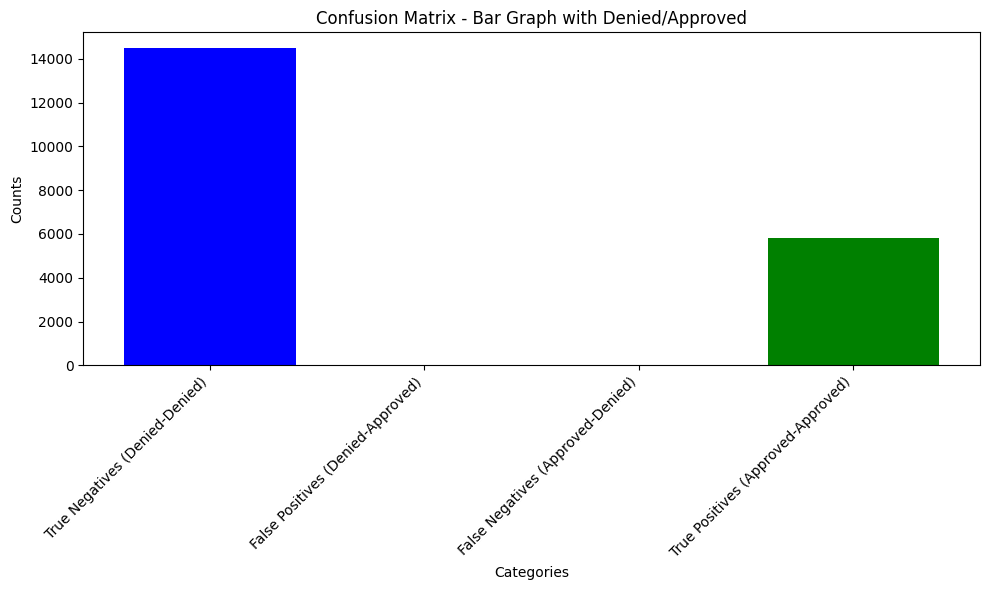

In [ ]:
# Bar Graph for Confusion Matrix
cm_labels = ['True Negatives (Denied-Denied)', 'False Positives (Denied-Approved)', 'False Negatives (Approved-Denied)', 'True Positives (Approved-Approved)']
cm_values = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]
plt.figure(figsize=(10, 6))
plt.bar(cm_labels, cm_values, color=['blue', 'orange', 'red', 'green'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Confusion Matrix - Bar Graph with Denied/Approved")
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14489
           1       1.00      1.00      1.00      5795

    accuracy                           1.00     20284
   macro avg       1.00      1.00      1.00     20284
weighted avg       1.00      1.00      1.00     20284

